<a href="https://colab.research.google.com/github/sandrazuniga/alura_store_challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
ing_total_tienda1 = tienda["Precio"].sum()
ing_total_tienda2 = tienda2["Precio"].sum()
ing_total_tienda3 = tienda3["Precio"].sum()
ing_total_tienda4 = tienda4["Precio"].sum()

print(f"Ingresos totales tienda 1: {ing_total_tienda1}")
print(f"Ingresos totales tienda 2: {ing_total_tienda2}")
print(f"Ingresos totales tienda 3: {ing_total_tienda3}")
print(f"Ingresos totales tienda 4: {ing_total_tienda4}")

Ingresos totales tienda 1: 1150880400.0
Ingresos totales tienda 2: 1116343500.0
Ingresos totales tienda 3: 1098019600.0
Ingresos totales tienda 4: 1038375700.0


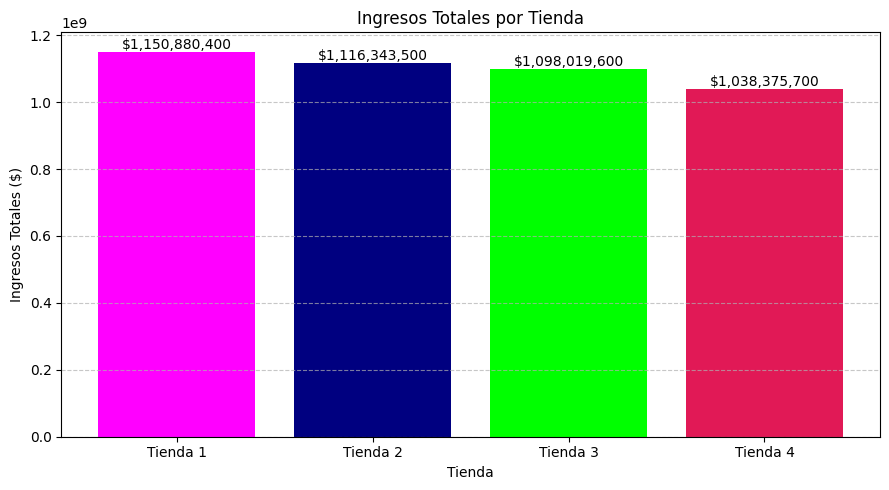

In [18]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ingresos = [ing_total_tienda1, ing_total_tienda2, ing_total_tienda3, ing_total_tienda4]
colores = ['#FF00FF', '#000080', '#00FF00', '#e11956']  # colores personalizados

plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, ingresos, color=colores)
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos Totales ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"${yval:,.0f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

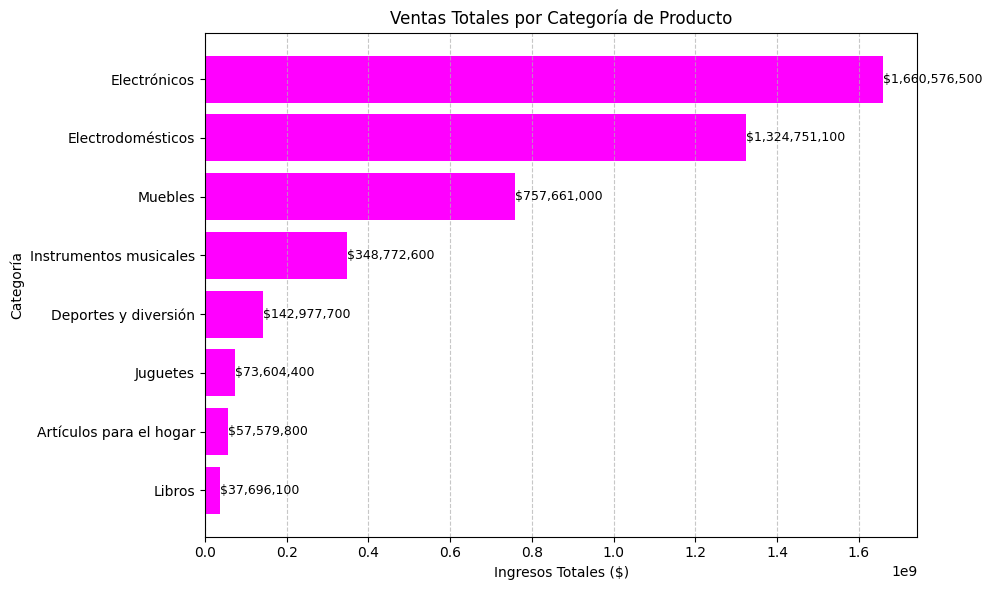

In [39]:
# Unir los datos de todas las tiendas en un solo DataFrame
datos_completos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Agrupar por categoría y sumar los precios
ventas_por_categoria = datos_completos.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
barras = plt.barh(ventas_por_categoria.index, ventas_por_categoria.values, color='Fuchsia')
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Ingresos Totales ($)')
plt.ylabel('Categoría')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Para que la categoría con más ventas quede arriba

# Etiquetas sobre las barras
for barra in barras:
    xval = barra.get_width()
    plt.text(xval + 10000, barra.get_y() + barra.get_height()/2, f"${xval:,.0f}", va='center', fontsize=9)

plt.tight_layout()
plt.show()



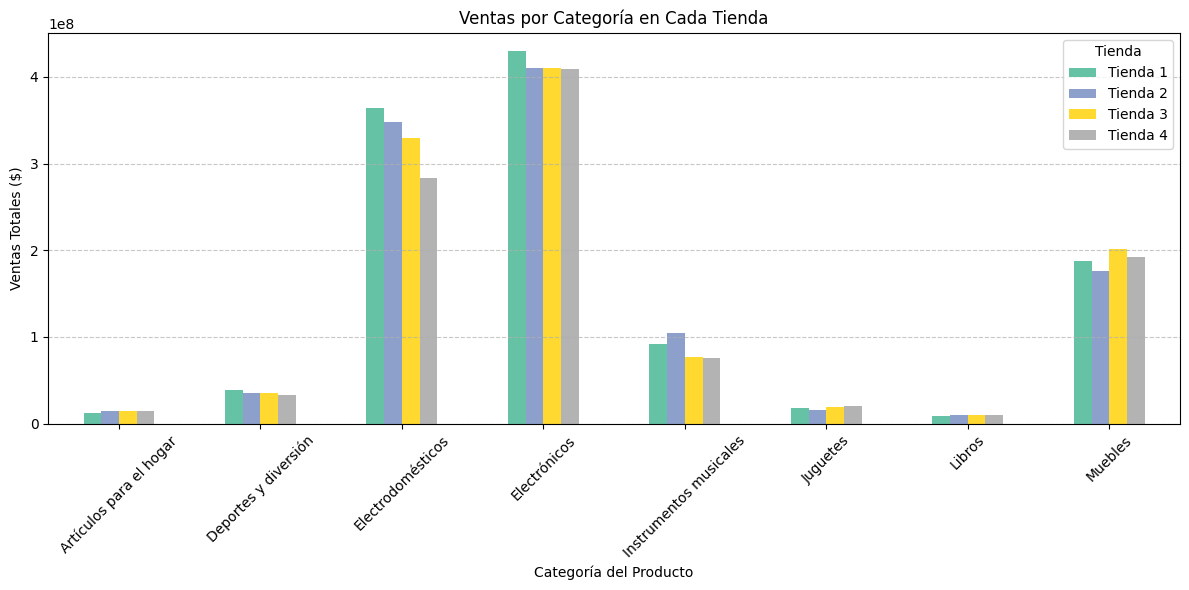

In [22]:
# Crear un DataFrame con los ingresos por categoría para cada tienda
categorias_t1 = tienda.groupby("Categoría del Producto")["Precio"].sum()
categorias_t2 = tienda2.groupby("Categoría del Producto")["Precio"].sum()
categorias_t3 = tienda3.groupby("Categoría del Producto")["Precio"].sum()
categorias_t4 = tienda4.groupby("Categoría del Producto")["Precio"].sum()

# Unir en un solo DataFrame para comparación
df_categorias = pd.DataFrame({
    "Tienda 1": categorias_t1,
    "Tienda 2": categorias_t2,
    "Tienda 3": categorias_t3,
    "Tienda 4": categorias_t4
}).fillna(0)

# Visualización
df_categorias.plot(kind='bar', figsize=(12, 6), colormap='Set2')
plt.title('Ventas por Categoría en Cada Tienda')
plt.xlabel('Categoría del Producto')
plt.ylabel('Ventas Totales ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Tienda')
plt.tight_layout()
plt.show()


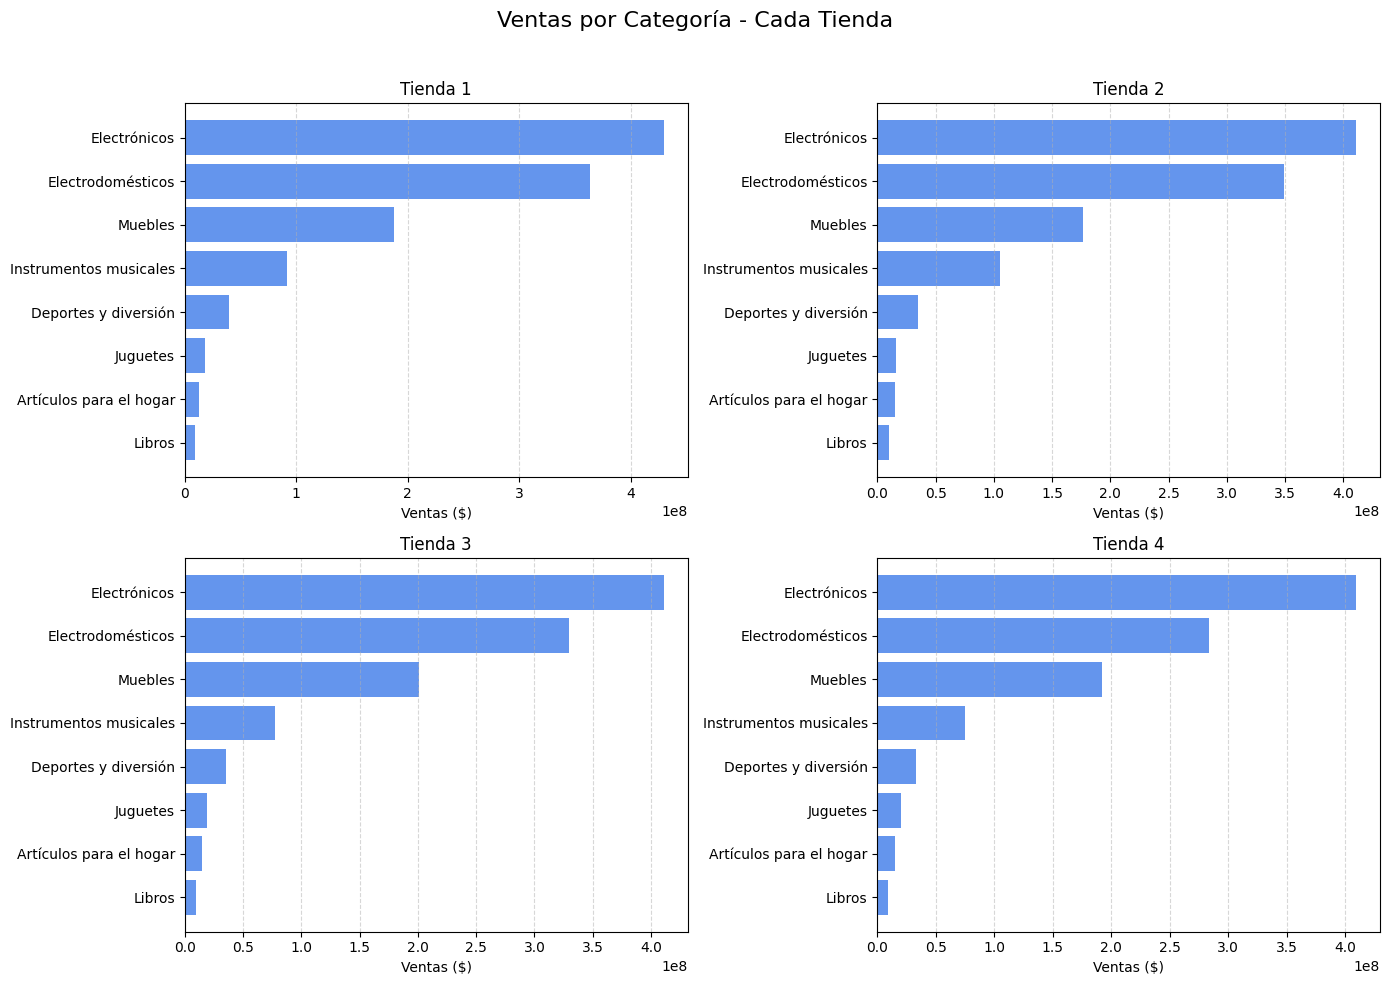

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
tiendas_data = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, ax in enumerate(axes.flatten()):
    categoria = tiendas_data[i].groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=True)
    ax.barh(categoria.index, categoria.values, color='cornflowerblue')
    ax.set_title(nombres_tiendas[i])
    ax.set_xlabel('Ventas ($)')
    ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.suptitle('Ventas por Categoría - Cada Tienda', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 3. Calificación promedio de la tienda


In [24]:
# Calificación promedio por tienda
calif_prom_t1 = tienda["Calificación"].mean()
calif_prom_t2 = tienda2["Calificación"].mean()
calif_prom_t3 = tienda3["Calificación"].mean()
calif_prom_t4 = tienda4["Calificación"].mean()

print(f"Calificación promedio Tienda 1: {calif_prom_t1:.2f}")
print(f"Calificación promedio Tienda 2: {calif_prom_t2:.2f}")
print(f"Calificación promedio Tienda 3: {calif_prom_t3:.2f}")
print(f"Calificación promedio Tienda 4: {calif_prom_t4:.2f}")

Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


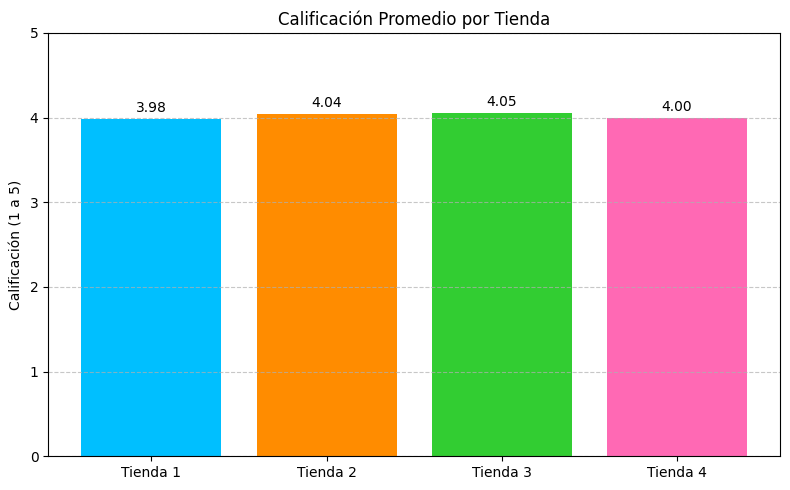

In [25]:
# Datos para el gráfico
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
calificaciones = [calif_prom_t1, calif_prom_t2, calif_prom_t3, calif_prom_t4]
colores = ['#00BFFF', '#FF8C00', '#32CD32', '#FF69B4']

plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, calificaciones, color=colores)
plt.title('Calificación Promedio por Tienda')
plt.ylim(0, 5)
plt.ylabel('Calificación (1 a 5)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.05, f"{yval:.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [27]:
# Calcular calificación promedio
calificaciones = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# Crear DataFrame y ordenar por calificación
df_calif = pd.DataFrame.from_dict(calificaciones, orient='index', columns=["Calificación Promedio"])
df_calif_ordenado = df_calif.sort_values(by="Calificación Promedio", ascending=False)

# Mostrar
print(df_calif_ordenado)


          Calificación Promedio
Tienda 3               4.048326
Tienda 2               4.037304
Tienda 4               3.995759
Tienda 1               3.976685


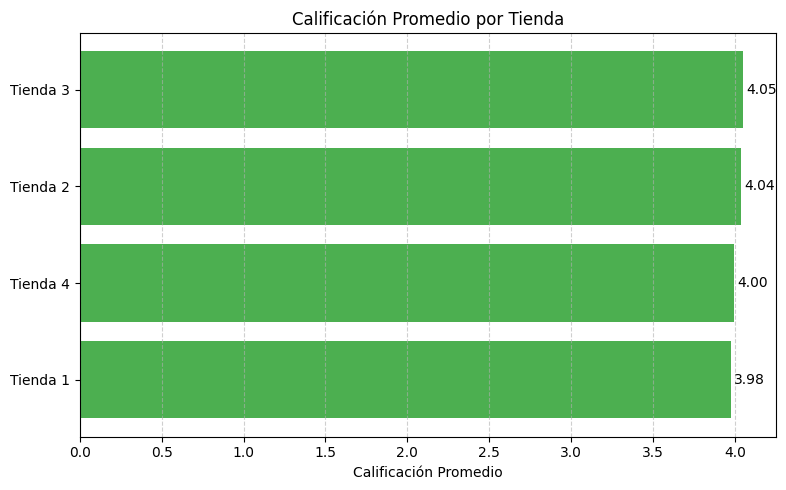

In [29]:
import matplotlib.pyplot as plt

# Calcular calificaciones promedio
calificaciones = {
    "Tienda 1": tienda["Calificación"].mean(),
    "Tienda 2": tienda2["Calificación"].mean(),
    "Tienda 3": tienda3["Calificación"].mean(),
    "Tienda 4": tienda4["Calificación"].mean()
}

# Crear DataFrame y ordenarlo
df_calif = pd.DataFrame.from_dict(calificaciones, orient='index', columns=["Calificación Promedio"])
df_calif_ordenado = df_calif.sort_values(by="Calificación Promedio", ascending=True)

# Gráfico
plt.figure(figsize=(8, 5))
barras = plt.barh(df_calif_ordenado.index, df_calif_ordenado["Calificación Promedio"], color="#4CAF50")
plt.xlabel("Calificación Promedio")
plt.title("Calificación Promedio por Tienda")

# Añadir etiquetas
for i, v in enumerate(df_calif_ordenado["Calificación Promedio"]):
    plt.text(v + 0.02, i, f"{v:.2f}", va='center')

plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [30]:
# Tienda 1
top5_tienda1 = tienda["Producto"].value_counts().head(5)
print("Top 5 productos más vendidos - Tienda 1:\n", top5_tienda1)

# Tienda 2
top5_tienda2 = tienda2["Producto"].value_counts().head(5)
print("\nTop 5 productos más vendidos - Tienda 2:\n", top5_tienda2)

# Tienda 3
top5_tienda3 = tienda3["Producto"].value_counts().head(5)
print("\nTop 5 productos más vendidos - Tienda 3:\n", top5_tienda3)

# Tienda 4
top5_tienda4 = tienda4["Producto"].value_counts().head(5)
print("\nTop 5 productos más vendidos - Tienda 4:\n", top5_tienda4)


Top 5 productos más vendidos - Tienda 1:
 Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64

Top 5 productos más vendidos - Tienda 2:
 Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64

Top 5 productos más vendidos - Tienda 3:
 Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64

Top 5 productos más vendidos - Tienda 4:
 Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


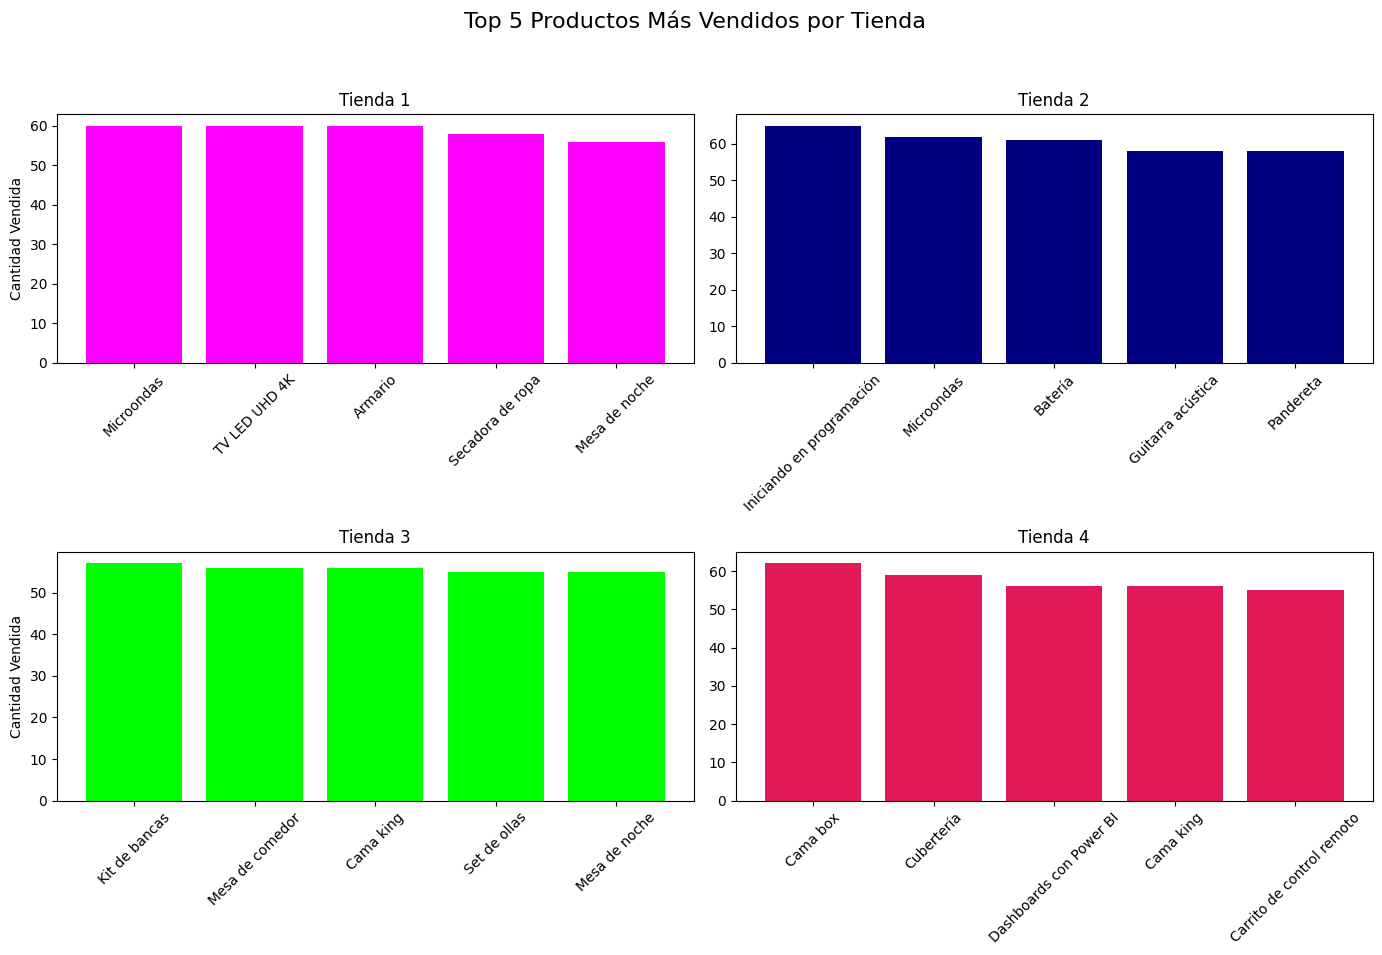

In [31]:
import matplotlib.pyplot as plt

# Calcular top 5 productos por tienda
top5_tienda1 = tienda["Producto"].value_counts().head(5)
top5_tienda2 = tienda2["Producto"].value_counts().head(5)
top5_tienda3 = tienda3["Producto"].value_counts().head(5)
top5_tienda4 = tienda4["Producto"].value_counts().head(5)

# Crear una figura con 4 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Top 5 Productos Más Vendidos por Tienda", fontsize=16)

# Tienda 1
axs[0, 0].bar(top5_tienda1.index, top5_tienda1.values, color="#FF00FF")
axs[0, 0].set_title("Tienda 1")
axs[0, 0].set_ylabel("Cantidad Vendida")
axs[0, 0].tick_params(axis='x', rotation=45)

# Tienda 2
axs[0, 1].bar(top5_tienda2.index, top5_tienda2.values, color="#000080")
axs[0, 1].set_title("Tienda 2")
axs[0, 1].tick_params(axis='x', rotation=45)

# Tienda 3
axs[1, 0].bar(top5_tienda3.index, top5_tienda3.values, color="#00FF00")
axs[1, 0].set_title("Tienda 3")
axs[1, 0].set_ylabel("Cantidad Vendida")
axs[1, 0].tick_params(axis='x', rotation=45)

# Tienda 4
axs[1, 1].bar(top5_tienda4.index, top5_tienda4.values, color="#e11956")
axs[1, 1].set_title("Tienda 4")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Para dejar espacio al título general
plt.show()


In [33]:
# Mostrar los 5 productos menos vendidos por tienda en formato de tabla
bottom5_tienda1 = tienda["Producto"].value_counts().tail(5)
bottom5_tienda2 = tienda2["Producto"].value_counts().tail(5)
bottom5_tienda3 = tienda3["Producto"].value_counts().tail(5)
bottom5_tienda4 = tienda4["Producto"].value_counts().tail(5)

# Imprimir resultados
print("Productos menos vendidos Tienda 1:")
print(bottom5_tienda1)
print("\n")

print("Productos menos vendidos Tienda 2:")
print(bottom5_tienda2)
print("\n")

print("Productos menos vendidos Tienda 3:")
print(bottom5_tienda3)
print("\n")

print("Productos menos vendidos Tienda 4:")
print(bottom5_tienda4)


Productos menos vendidos Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64


Productos menos vendidos Tienda 2:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64


Productos menos vendidos Tienda 3:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64


Productos menos vendidos Tienda 4:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


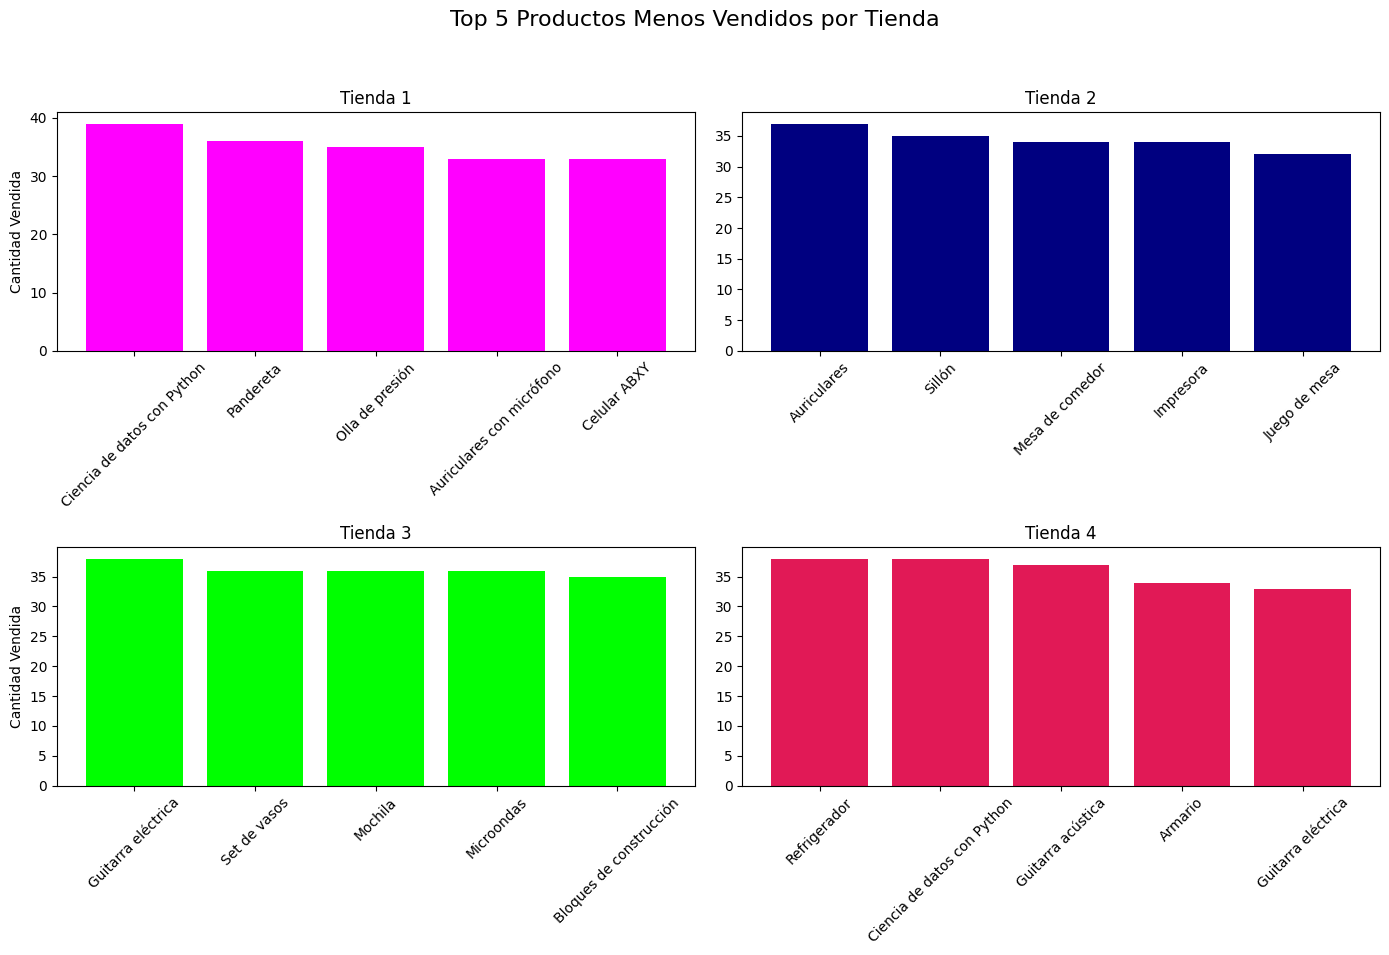

In [32]:
# Calcular top 5 productos menos vendidos por tienda
bottom5_tienda1 = tienda["Producto"].value_counts().tail(5)
bottom5_tienda2 = tienda2["Producto"].value_counts().tail(5)
bottom5_tienda3 = tienda3["Producto"].value_counts().tail(5)
bottom5_tienda4 = tienda4["Producto"].value_counts().tail(5)

# Crear una figura con 4 subgráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Top 5 Productos Menos Vendidos por Tienda", fontsize=16)

# Tienda 1
axs[0, 0].bar(bottom5_tienda1.index, bottom5_tienda1.values, color="#FF00FF")
axs[0, 0].set_title("Tienda 1")
axs[0, 0].set_ylabel("Cantidad Vendida")
axs[0, 0].tick_params(axis='x', rotation=45)

# Tienda 2
axs[0, 1].bar(bottom5_tienda2.index, bottom5_tienda2.values, color="#000080")
axs[0, 1].set_title("Tienda 2")
axs[0, 1].tick_params(axis='x', rotation=45)

# Tienda 3
axs[1, 0].bar(bottom5_tienda3.index, bottom5_tienda3.values, color="#00FF00")
axs[1, 0].set_title("Tienda 3")
axs[1, 0].set_ylabel("Cantidad Vendida")
axs[1, 0].tick_params(axis='x', rotation=45)

# Tienda 4
axs[1, 1].bar(bottom5_tienda4.index, bottom5_tienda4.values, color="#e11956")
axs[1, 1].set_title("Tienda 4")
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Para dejar espacio al título general
plt.show()


# 5. Envío promedio por tienda

In [34]:
# Calcular el envío promedio por tienda
envio_promedio_tienda1 = tienda["Costo de envío"].mean()
envio_promedio_tienda2 = tienda2["Costo de envío"].mean()
envio_promedio_tienda3 = tienda3["Costo de envío"].mean()
envio_promedio_tienda4 = tienda4["Costo de envío"].mean()

# Imprimir resultados
print(f"Envío promedio Tienda 1: {envio_promedio_tienda1:.2f}")
print(f"Envío promedio Tienda 2: {envio_promedio_tienda2:.2f}")
print(f"Envío promedio Tienda 3: {envio_promedio_tienda3:.2f}")
print(f"Envío promedio Tienda 4: {envio_promedio_tienda4:.2f}")


Envío promedio Tienda 1: 26018.61
Envío promedio Tienda 2: 25216.24
Envío promedio Tienda 3: 24805.68
Envío promedio Tienda 4: 23459.46


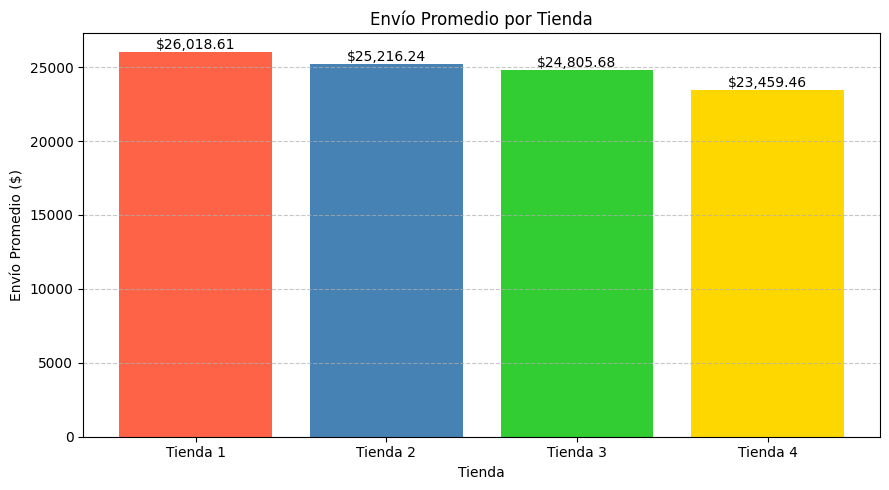

In [35]:
# Crear una lista con los datos del envío promedio por tienda
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
envios_promedio = [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]
colores = ['#FF6347', '#4682B4', '#32CD32', '#FFD700']  # Colores personalizados para las barras

# Crear el gráfico de barras
plt.figure(figsize=(9, 5))
barras = plt.bar(tiendas, envios_promedio, color=colores)
plt.title('Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Envío Promedio ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas sobre las barras
for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval, f"${yval:,.2f}",
             ha='center', va='bottom', fontsize=10)

# Ajustar el gráfico
plt.tight_layout()
plt.show()


In [36]:
# Calcular el costo total de envío por tienda
costo_envio_tienda1 = tienda["Costo de envío"].sum()
costo_envio_tienda2 = tienda2["Costo de envío"].sum()
costo_envio_tienda3 = tienda3["Costo de envío"].sum()
costo_envio_tienda4 = tienda4["Costo de envío"].sum()

# Calcular la rentabilidad (ingreso total - costo de envío) por tienda
rentabilidad_tienda1 = ing_total_tienda1 - costo_envio_tienda1
rentabilidad_tienda2 = ing_total_tienda2 - costo_envio_tienda2
rentabilidad_tienda3 = ing_total_tienda3 - costo_envio_tienda3
rentabilidad_tienda4 = ing_total_tienda4 - costo_envio_tienda4

# Crear una lista con las rentabilidades por tienda
rentabilidades = [rentabilidad_tienda1, rentabilidad_tienda2, rentabilidad_tienda3, rentabilidad_tienda4]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Encontrar la tienda con la menor rentabilidad
tienda_menos_rentable = tiendas[rentabilidades.index(min(rentabilidades))]
rentabilidad_menos_rentable = min(rentabilidades)

# Imprimir resultados
print(f"La tienda menos rentable es: {tienda_menos_rentable} con una rentabilidad de ${rentabilidad_menos_rentable:,.2f}")


La tienda menos rentable es: Tienda 4 con una rentabilidad de $983,058,300.00


# 5. Conclusión

Diagnóstico: Análisis de Datos y Evaluación del Desempeño

Se realizó un análisis de datos que incluyó métricas clave como ingresos por tienda, número de ventas, ticket promedio, cantidad de productos vendidos y desempeño mensual.

**Resultados más relevantes:**

- **Tiendas con mejor desempeño**: Tiendas 1, 2 y 3 mostraron consistencia en ventas, ticket promedio competitivo y mayores ingresos totales.
- **Tienda 4**: Presenta los siguientes indicadores críticos:
  - Menor ingreso total anual.
  - Menor número de ventas y menor volumen de productos vendidos.
  - Ticket promedio más bajo en comparación con el resto de las tiendas.
  - Inestabilidad mensual con caídas marcadas, incluso en meses donde las demás tiendas crecieron.

---

## 6. Recomendación Estratégica: Cierre de la Tienda 4

Basándonos en la evidencia cuantitativa, se recomienda el cierre de la **Tienda 4** como una medida estratégica para:

- Reducir costos operacionales asociados a una tienda que no está generando retorno adecuado.
- Reasignar recursos (humanos, logísticos, de inventario) a las tiendas con mejor desempeño.
- Enfocar la estrategia digital en las tiendas que muestran mayor crecimiento y estabilidad.
- Mantener una operación más ágil y rentable.

Esta decisión permitirá optimizar la eficiencia del negocio y fortalecer el posicionamiento general de la marca.

Sr. Juan:

Esta propuesta busca cuidar su inversión y capitalizar el trabajo que usted ha desarrollado durante años, ayudándolo a fortalecer su operación comercial. La recomendación de cerrar la tienda 4 no es una medida drástica, sino una decisión estratégica basada en datos concretos, pensada para concentrar esfuerzos donde hay más retorno y potencial de crecimiento.